In [214]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [215]:
# 2. Import the dataset
df = pd.read_csv('D:\My Datasets\heart.csv')

In [216]:
# 3. Exploratory data analysis: Data Information
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    i

In [217]:
# 3. Exploratory data analysis: Class Inbalance?
print(df['target'].value_counts())
print()
print(df['target'].value_counts()/np.float64(len(df)))

1    165
0    138
Name: target, dtype: int64

1    0.544554
0    0.455446
Name: target, dtype: float64


In [218]:
# 3. Exploratory data analysis: Missing Data?
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


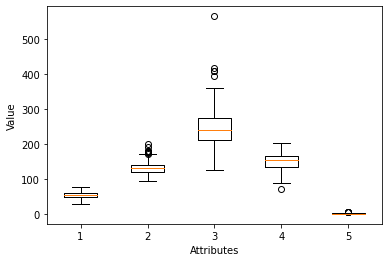

In [219]:
# 3. Exploratory data analysis: Outliers?
data_to_boxplot = [df['age'], df['trestbps'], df['chol'], df['thalach'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [220]:
# 4. Split data into separate training and test set
training_points = df.drop(columns=['target'])
training_labels = df['target']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [221]:
# 5. Fit K Neighbours Classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0]


In [222]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[19 19]
 [18 35]]
0.5934065934065934


In [223]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0]
[[26 12]
 [22 31]]
0.6263736263736264


In [224]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0]
[[25 13]
 [16 37]]
0.6813186813186813


[0.5274725274725275, 0.5494505494505495, 0.6263736263736264, 0.6483516483516484, 0.5934065934065934, 0.6483516483516484, 0.6153846153846154, 0.6263736263736264, 0.6373626373626373, 0.6263736263736264, 0.5934065934065934, 0.6373626373626373, 0.6373626373626373, 0.6483516483516484, 0.6813186813186813, 0.6703296703296703, 0.6813186813186813, 0.6813186813186813, 0.6923076923076923, 0.6813186813186813, 0.7032967032967034, 0.7032967032967034, 0.6593406593406593, 0.6373626373626373, 0.6373626373626373, 0.6483516483516484, 0.6263736263736264, 0.6263736263736264, 0.6263736263736264, 0.6373626373626373, 0.6153846153846154, 0.6373626373626373, 0.5824175824175825, 0.6263736263736264, 0.5824175824175825, 0.6043956043956044, 0.6153846153846154, 0.6043956043956044, 0.6263736263736264, 0.6373626373626373, 0.6153846153846154, 0.6483516483516484, 0.6153846153846154, 0.6263736263736264, 0.5934065934065934, 0.6153846153846154, 0.5824175824175825, 0.5934065934065934, 0.5934065934065934]


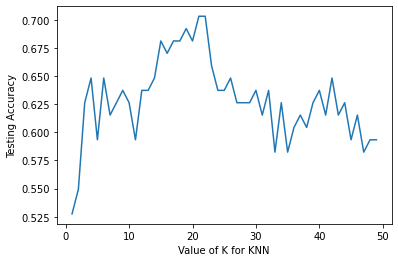

In [225]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [226]:
# 8. Improving Accuracy: Changing split ratio
training_points = df.drop(columns=['target'])
training_labels = df['target']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


[0.5409836065573771, 0.6229508196721312, 0.7049180327868853, 0.6885245901639344, 0.5737704918032787, 0.639344262295082, 0.639344262295082, 0.5901639344262295, 0.639344262295082, 0.6885245901639344, 0.6885245901639344, 0.6885245901639344, 0.6721311475409836, 0.6885245901639344, 0.7049180327868853, 0.7213114754098361, 0.7049180327868853, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.7213114754098361, 0.7377049180327869, 0.7049180327868853, 0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.7213114754098361, 0.7049180327868853, 0.6721311475409836, 0.6557377049180327, 0.639344262295082, 0.6557377049180327, 0.639344262295082, 0.6721311475409836, 0.6557377049180327, 0.7049180327868853, 0.6721311475409836]


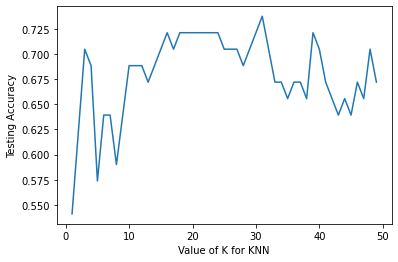

In [227]:
# 8. Improving Accuracy: Changing split ratio
# Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

<AxesSubplot:>

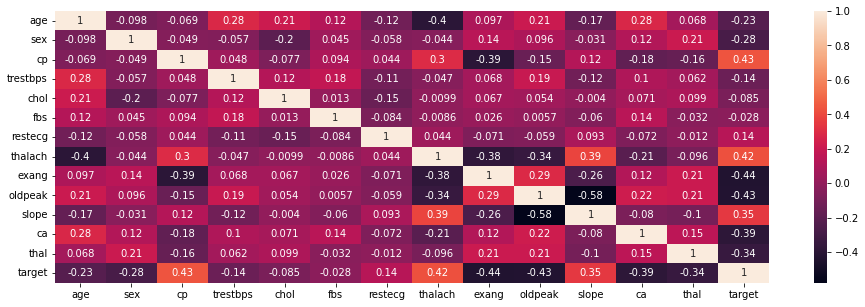

In [228]:
# 9. Improving Accuracy: Feature Engineering

dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [229]:
# 10. Improving Accuracy: Feature Engineering
df = df.drop(columns=['trestbps', 'chol', 'fbs', 'restecg'])

In [230]:
# 11. Split data into separate training and test set
training_points = df.drop(columns=['target'])
training_labels = df['target']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 9)
(242,)
(61, 9)
(61,)


[0.5737704918032787, 0.5901639344262295, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6557377049180327, 0.6721311475409836, 0.6721311475409836, 0.6721311475409836, 0.6885245901639344, 0.6557377049180327, 0.6721311475409836, 0.639344262295082, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6721311475409836, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327, 0.6721311475409836, 0.6721311475409836, 0.7049180327868853, 0.6721311475409836, 0.7213114754098361, 0.6721311475409836, 0.7049180327868853, 0.6721311475409836, 0.7213114754098361, 0.7377049180327869, 0.7540983606557377, 0.7213114754098361, 0.7377049180327869, 0.7377049180327869, 0.7540983606557377, 0.7540983606557377, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361]


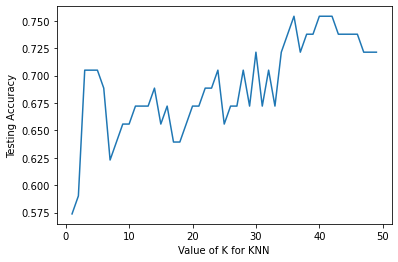

In [231]:
# 11. Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [232]:
# 12. Improving Accuracy: Feature Scaling
df.describe()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [233]:
# 12. Improving Accuracy: Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#Create copy of dataset.
df = df.copy()

#Rescaling features age, thalach, oldpeak.
scaler = MinMaxScaler()

features = [['age', 'thalach', 'oldpeak']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])

In [234]:
# 13. Split data into separate training and test set
training_points = df.drop(columns=['target'])
training_labels = df['target']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 9)
(242,)
(61, 9)
(61,)


[0.8360655737704918, 0.7868852459016393, 0.819672131147541, 0.8524590163934426, 0.9180327868852459, 0.9180327868852459, 0.8852459016393442, 0.8852459016393442, 0.8688524590163934, 0.8852459016393442, 0.8688524590163934, 0.8688524590163934, 0.8852459016393442, 0.8360655737704918, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8688524590163934, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8524590163934426, 0.8524590163934426, 0.8688524590163934, 0.8524590163934426, 0.8688524590163934, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442]


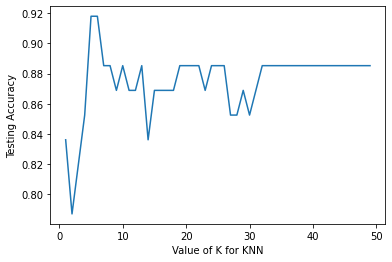

In [235]:
# 14. Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()